In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pickle
import numpy as np
from keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding
from keras.layers import Input,Activation,Dense, Permute, Dropout, add, dot, concatenate, LSTM
from tensorflow.keras.utils import pad_sequences # Use tensorflow.keras.utils for pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer # Use tensorflow.keras.preprocessing.text for Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

with open('/content/drive/My Drive/test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)


Mounted at /content/drive


In [ ]:
type(test_data)

list

In [ ]:
type(train_data)

list

In [ ]:
len(test_data)

1000

In [ ]:
len(train_data)

10000

In [ ]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
train_data[0][1]

['Is', 'Sandra', 'in', 'the', 'hallway', '?']

In [ ]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
train_data[0][2]

'no'

In [ ]:
all_data = test_data + train_data

In [ ]:
len(all_data)

11000

In [ ]:
vocab = set()
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [ ]:
vocab.add('no')

In [ ]:
vocab.add('yes')

In [ ]:
vocab_len = len(vocab) + 1

In [ ]:
vocab_len

38

In [ ]:
all_story_lens = [len(data[0]) for data in all_data]

In [ ]:
max_story_len = max(all_story_lens)

In [ ]:
max_story_len

156

In [ ]:
max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
max_question_len

6

In [ ]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'to': 1,
 'went': 2,
 'bedroom': 3,
 'back': 4,
 'john': 5,
 'grabbed': 6,
 'sandra': 7,
 'garden': 8,
 'hallway': 9,
 'is': 10,
 'put': 11,
 'football': 12,
 'in': 13,
 'yes': 14,
 'daniel': 15,
 'mary': 16,
 'journeyed': 17,
 'up': 18,
 'moved': 19,
 'discarded': 20,
 'travelled': 21,
 'office': 22,
 'apple': 23,
 'dropped': 24,
 'there': 25,
 'got': 26,
 'down': 27,
 '?': 28,
 'left': 29,
 'no': 30,
 'milk': 31,
 'kitchen': 32,
 'took': 33,
 'bathroom': 34,
 '.': 35,
 'the': 36,
 'picked': 37}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

In [ ]:
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
len(train_story_seq)

10000

In [ ]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
    #Stories
    X = []
    # Question
    Xq = []
    # Y question Answer (yes/no)
    Y = []

    for story,query,answer in data:
        # for each story
        # [23,16,......]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)

    return(pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))

In [ ]:
inputs_train, queries_train, answer_train = vectorize_stories(train_data)

In [ ]:
input_test, queries_test, answer_test = vectorize_stories(test_data)

In [ ]:
inputs_train

array([[ 0,  0,  0, ..., 36,  3, 35],
       [ 0,  0,  0, ..., 36,  9, 35],
       [ 0,  0,  0, ..., 36, 34, 35],
       ...,
       [ 0,  0,  0, ..., 36,  3, 35],
       [ 0,  0,  0, ..., 31, 25, 35],
       [ 0,  0,  0, ..., 23, 25, 35]], dtype=int32)

In [ ]:
input_test

array([[ 0,  0,  0, ..., 36,  3, 35],
       [ 0,  0,  0, ..., 36,  8, 35],
       [ 0,  0,  0, ..., 36,  8, 35],
       ...,
       [ 0,  0,  0, ..., 36, 23, 35],
       [ 0,  0,  0, ..., 36,  8, 35],
       [ 0,  0,  0, ..., 23, 25, 35]], dtype=int32)

In [ ]:
queries_train

array([[10,  7, 13, 36,  9, 28],
       [10, 15, 13, 36, 34, 28],
       [10, 15, 13, 36, 22, 28],
       ...,
       [10,  7, 13, 36,  9, 28],
       [10, 16, 13, 36, 32, 28],
       [10, 16, 13, 36,  3, 28]], dtype=int32)

In [ ]:
queries_test

array([[10,  5, 13, 36, 32, 28],
       [10,  5, 13, 36, 32, 28],
       [10,  5, 13, 36,  8, 28],
       ...,
       [10, 16, 13, 36,  3, 28],
       [10,  7, 13, 36,  8, 28],
       [10, 16, 13, 36,  8, 28]], dtype=int32)

In [ ]:
answer_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.word_index['yes']

14

In [ ]:
tokenizer.word_index['no']

30

In [ ]:
input_sequence=Input((max_story_len,))
question = Input((max_question_len,))

In [ ]:
vocab_size=len(vocab)+1

In [ ]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [ ]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [ ]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [ ]:
match = dot([input_encoded_m,question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [ ]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [ ]:
answer = concatenate([response,question_encoded])

In [ ]:
answer = LSTM(32)(answer)

In [ ]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [ ]:
answer = Activation('softmax')(answer)

In [ ]:
model = Model([input_sequence,question], answer)

In [ ]:
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 156)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 156, 64)        │          2,432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 6, 64)          │          2,432 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot (Dot)                 │ (None, 156, 6)         │              0 │ sequential[0][0],      │
│                           │                        │                │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 156, 6)         │              0 │ dot[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 156, 6)         │            228 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 156, 6)         │              0 │ activation[0][0],      │
│                           │                        │                │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ permute (Permute)         │ (None, 6, 156)         │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 6, 220)         │              0 │ permute[0][0],         │
│                           │                        │                │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 32)             │         32,384 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32)             │              0 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 38)             │          1,254 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 38)             │              0 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,730 (151.29 KB)

 Trainable params: 38,730 (151.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit([inputs_train,queries_train],answer_train,batch_size=32,epochs=25,validation_data=([input_test,queries_test],answer_test))

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.4703 - loss: 1.2702 - val_accuracy: 0.4970 - val_loss: 0.6967
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5065 - loss: 0.7107 - val_accuracy: 0.5030 - val_loss: 0.6955
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4908 - loss: 0.6996 - val_accuracy: 0.5030 - val_loss: 0.6936
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4950 - loss: 0.6970 - val_accuracy: 0.4970 - val_loss: 0.6945
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4998 - loss: 0.6963 - val_accuracy: 0.4970 - val_loss: 0.6942
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5005 - loss: 0.6948 - val_accuracy: 0.4970 - val_loss: 0.6933
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5111 - loss: 0.6942 - val_accuracy: 0.5030 - val_loss: 0.6933
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4948 - loss: 0.6957 - val_ac

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


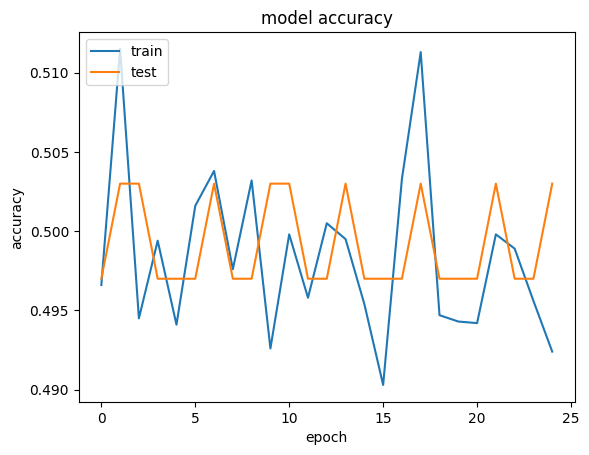

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.savefig('screenshot.png',bbox_inches='tight')

In [ ]:
pred_results = model.predict(([input_test,queries_test]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [ ]:
val_max = np.argmax(pred_results[0])

In [ ]:
for key, val in tokenizer.word_index.items():
    if val==val_max:
        k=key

In [ ]:
k

'no'

In [ ]:
# prompt: accuracy, precision, recall, and F-1 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming pred_results contains predicted probabilities for each class
# and answer_test contains the true labels (one-hot encoded)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(pred_results, axis=1)

# Convert one-hot encoded true labels to class labels
true_labels = np.argmax(answer_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted') # Use weighted average for multi-class
recall = recall_score(true_labels, predicted_labels, average='weighted') # Use weighted average for multi-class
f1 = f1_score(true_labels, predicted_labels, average='weighted') # Use weighted average for multi-class


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.503
Precision: 0.25300900000000004
Recall: 0.503
F1-score: 0.3366719893546241


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# prompt: a summary report of the architecture model used

print("Model Architecture Summary:")
print("-------------------------")
print("The model is a memory network designed for question answering.")
print("It utilizes an encoder-decoder architecture with attention mechanism.")
print("The main components are:")
print("1. Input Encoder (m):")
print("   - Embedding layer: Transforms input story words into vector representations.")
print("   - Dropout layer: Regularizes the model to prevent overfitting.")
print("2. Input Encoder (c):")
print("   - Embedding layer: Transforms input story words into vector representations.")
print("   - Dropout layer: Regularizes the model to prevent overfitting.")
print("3. Question Encoder:")
print("   - Embedding layer: Transforms input question words into vector representations.")
print("   - Dropout layer: Regularizes the model to prevent overfitting.")
print("4. Attention Mechanism (match):")
print("   - Dot product between input encoder (m) and question encoder.")
print("   - Softmax activation: Generates attention weights for input words based on their relevance to the question.")
print("5. Response Generation (response):")
print("   - Element-wise addition between attention weights and input encoder (c).")
print("   - Permute layer: Re-arranges the tensor dimensions.")
print("6. Answer Generation:")
print("   - Concatenates the response and question encoder output.")
print("   - LSTM layer: Processes the concatenated tensor sequentially to capture contextual information.")
print("   - Dropout layer: Regularizes the model to prevent overfitting.")
print("   - Dense layer: Maps the LSTM output to the vocabulary size.")
print("   - Softmax activation: Outputs a probability distribution over the possible answer words (yes/no).")
print("-------------------------")


Model Architecture Summary:
-------------------------
The model is a memory network designed for question answering.
It utilizes an encoder-decoder architecture with attention mechanism.
The main components are:
1. Input Encoder (m):
   - Embedding layer: Transforms input story words into vector representations.
   - Dropout layer: Regularizes the model to prevent overfitting.
2. Input Encoder (c):
   - Embedding layer: Transforms input story words into vector representations.
   - Dropout layer: Regularizes the model to prevent overfitting.
3. Question Encoder:
   - Embedding layer: Transforms input question words into vector representations.
   - Dropout layer: Regularizes the model to prevent overfitting.
4. Attention Mechanism (match):
   - Dot product between input encoder (m) and question encoder.
   - Softmax activation: Generates attention weights for input words based on their relevance to the question.
5. Response Generation (response):
   - Element-wise addition between atte